In [21]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
N = 100
D = 2

X = np.random.randn(N,D)
ones = np.ones((N, 1))

# ================= часть 1 ==========

# конкатенируйте в одной переменной X и ones 

In [22]:
X = np.column_stack((ones, X))

# создайте случайный вектор весов w нужной размерности

In [23]:
w = np.random.randn(D + 1, 1)

In [24]:
print(w.shape)
print(X.shape)

(3, 1)
(100, 3)


# вычислите $z = w^Tx$

In [25]:
z = X @ w
z.shape

(100, 1)

# вычислите $\sigma(z)$ (предварительно реализуйте функцию sigmoid)

In [26]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

Y = sigmoid(z)

# ================= часть 2 ==========

In [27]:
import numpy as np
N = 100
D = 2

# генерация датасета

np.random.seed(42)
X = np.random.randn(N, D)
ones = np.ones((N, 1))
X[:50,:] = X[:50,:] - 2*np.ones((50,D))
X[50:,:] = X[50:,:] + 2*np.ones((50,D))

# метки из train set
T = np.array([0]*50 + [1]*50)
# данные из части 1
ones = np.ones((N, 1))

Xb = np.concatenate((ones, X), axis=1)

w = np.random.randn(D + 1)

z = Xb.dot(w)

def sigmoid(z):
    return 1/(1 + np.exp(-z))

Y = sigmoid(z)

# реализуйте функцию: def cross_entropy(T, Y):

In [28]:
def binary_cross_entropy(T, Y):
  return -1 * np.array([t * np.log(y) + (1 - t) * np.log(1 - y) for t, y in zip(T, Y)]).mean()

In [29]:
print(binary_cross_entropy(T, Y))

0.060301620601623994


## задайте веса с помощью точного решения [0,-4,-4]

In [30]:
X0 = X[T == 0]
X1 = X[T == 1]

sigma = np.cov(X0.T)
sigma[1][0] = 0
sigma[0][1] = 0

print(sigma)
mu_1 = np.array([data.mean() for data in X0.T])
mu_2 = np.array([data.mean() for data in X1.T])
sigma_inv = linalg.inv(sigma)

w = (mu_2 - mu_1) @ sigma_inv
print(w)
b = 1/2 * mu_1.T @ sigma_inv @ mu_1 - 1/2 * mu_2.T @ sigma_inv @ mu_2 + np.log( ( len(X0) / len(X) ) / (1 - ( len(X0) / len(X) ) ) )
print(b)

[[0.69631545 0.        ]
 [0.         0.96798885]]
[5.802288  4.3513719]
0.5224933024235856


# вычислите z и Y

In [31]:
z = X.dot(w.T) + b
Y = sigmoid(z)

# вычислите cross_entropy(T, Y)

In [32]:
print(binary_cross_entropy(T, Y))

1.5288868989303075e-05


# ================ часть 3 ==============

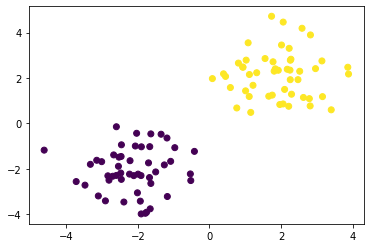

In [33]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=T)

# выполните 100 итераций градиентного спуска
### $J = crossentr + \frac{1}{2} \alpha w^Tw$

In [34]:
w = np.array([0, 1, 1])
epochs = 100
lr = 0.1
for epoch in range(epochs):
  pred = sigmoid(Xb.dot(w.T))
  loss = binary_cross_entropy(T, pred)
  w = w - lr * Xb.T @ (pred - T)

# выведите новые веса w
# нарисуйте датасет с границей (классификтором)

In [35]:
print(w)
print(binary_cross_entropy(T, sigmoid(Xb.dot(w.T))))

[0.07612547 2.99941236 2.95035906]
0.0005143453959422416


# =========== часть 4 =============
# добавьте регуляризацию $L_2$

In [41]:
w = np.array([0, 1, 1])
epochs = 100
lr = 0.1
r = 0.05
for epoch in range(epochs):
  pred = sigmoid(Xb.dot(w.T))
  loss = binary_cross_entropy(T, pred) + 1/2 * r * w @ w.T / len(pred)
  w = w - lr * (Xb.T @ (pred - T) + r * w / len(pred))

In [42]:
print(w)
print(binary_cross_entropy(T, sigmoid(Xb.dot(w.T))))

[0.07595175 2.99212337 2.94310958]
0.0005212297480260492


# выведите новые веса w
# нарисуйте датасет с границей (классификтором)

In [38]:
xx = np.linspace(-6, 6)
b = w[0]/w[2]
x1 = -w[1]/w[2]

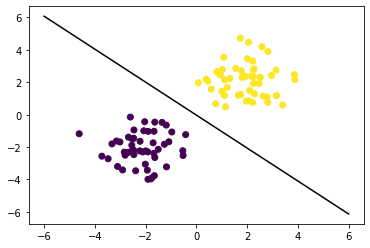

In [39]:
plt.scatter(X[:,0], X[:,1], c=T)

yy = x1 * xx - b

plt.plot(xx, yy, 'k-')